# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("01_source/tabula_ch/tabula_wasserkaefer.csv")

In [6]:
df.head()

,ORDER,FAMILY,Artname,N,S,CH,Bemerkungen
0,ADEPHAGA (Wasserkäfer),Hygrobiidae (Feuchtkäfer),Hygrobia hermanni (Fabricius),2,2,2,schlammige stehende Gewässer
1,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),Brychius elevatus (Panzer),3,3,3,langsam fliessende Gewässer
2,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),Halipius obliquus (Fabricius),3,3,3,Kiesgruben
3,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),H. confinis Stephens,3,3,3,"Kiesgruben, Wiesengräben"
4,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),H. fluviatilis Aube,2,2,2,vegetationsreiche Bäche


In [7]:
len (df)

109

In [8]:
df.pop("N")
df.pop("S")

0      2
1      3
2      3
3      3
4      2
5      3
6      -
7      -
8      4
9      3
10     3
11     -
12     4
13     3
14     3
15     3
16     -
17     3
18     4
19     -
20     2
21     -
22     3
23     n
24     4
25     3
26     -
27     -
28     -
29     -
      ..
79     -
80     -
81     3
82     2
83     -
84     3
85     -
86     3
87     3
88     2
89     -
90     3
91     3
92     2
93     4
94     2
95     -
96     2
97     2
98     -
99     2
100    2
101    4
102    -
103    -
104    2
105    -
106    3
107    -
108    -
Name: S, Length: 109, dtype: object

In [9]:
df.head(2)

,ORDER,FAMILY,Artname,CH,Bemerkungen
0,ADEPHAGA (Wasserkäfer),Hygrobiidae (Feuchtkäfer),Hygrobia hermanni (Fabricius),2,schlammige stehende Gewässer
1,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),Brychius elevatus (Panzer),3,langsam fliessende Gewässer


In [10]:
df.rename(columns={"ORDER":"order", "FAMILY":"family","Artname":"sc name","CH":"ch cat", "Bemerkungen":"bemerkungen"},inplace=True)

In [11]:
df.head(2)

,order,family,sc name,ch cat,bemerkungen
0,ADEPHAGA (Wasserkäfer),Hygrobiidae (Feuchtkäfer),Hygrobia hermanni (Fabricius),2,schlammige stehende Gewässer
1,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),Brychius elevatus (Panzer),3,langsam fliessende Gewässer


In [12]:
df['einteilung'] = 'Insekten'
df['untergruppe'] = 'Wasserkäfer'


In [13]:
df.head(2)

,order,family,sc name,ch cat,bemerkungen,einteilung,untergruppe
0,ADEPHAGA (Wasserkäfer),Hygrobiidae (Feuchtkäfer),Hygrobia hermanni (Fabricius),2,schlammige stehende Gewässer,Insekten,Wasserkäfer
1,ADEPHAGA (Wasserkäfer),Haliplidae (Wassertreter),Brychius elevatus (Panzer),3,langsam fliessende Gewässer,Insekten,Wasserkäfer


In [14]:
df["ch cat"].value_counts()

3    47
2    42
4    12
1     8
Name: ch cat, dtype: int64

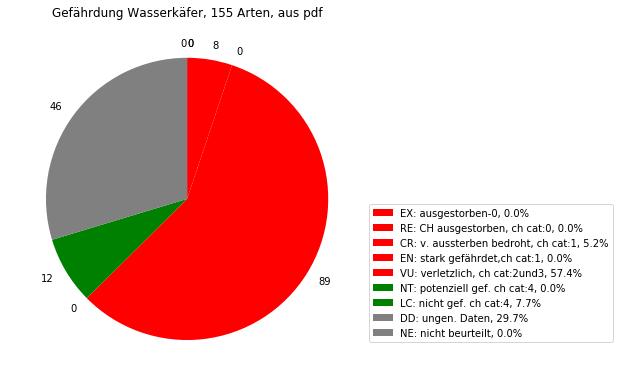

In [15]:
values = [0, 0, 8, 0, 89, 0, 12, 46, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben-0', 'RE: CH ausgestorben, ch cat:0',
    'CR: v. aussterben bedroht, ch cat:1', 'EN: stark gefährdet,ch cat:1', 
    'VU: verletzlich, ch cat:2und3',"NT: potenziell gef. ch cat:4",
    "LC: nicht gef. ch cat:4","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Wasserkäfer, 155 Arten, aus pdf')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()